In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, learning_curve

from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet


In [10]:

data = pd.read_csv('/content/boston housing.csv')
num_columns = data.shape[1]
data.columns = [f"feature {i+1}" for i in range(num_columns)]

print("Shape:", data.shape)
print("Columns:", data.columns)
data.head()


Shape: (505, 105)
Columns: Index(['feature 1', 'feature 2', 'feature 3', 'feature 4', 'feature 5',
       'feature 6', 'feature 7', 'feature 8', 'feature 9', 'feature 10',
       ...
       'feature 96', 'feature 97', 'feature 98', 'feature 99', 'feature 100',
       'feature 101', 'feature 102', 'feature 103', 'feature 104',
       'feature 105'],
      dtype='object', length=105)


,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,feature 10,...,feature 96,feature 97,feature 98,feature 99,feature 100,feature 101,feature 102,feature 103,feature 104,feature 105
0,0.000236,0.0,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,...,0.058064,0.104962,0.021462,0.306021,0.553191,0.113111,1.000000,0.204470,0.041808,21.6
1,0.000236,0.0,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,...,0.058064,0.103885,0.006661,0.306021,0.547514,0.035109,0.979580,0.062814,0.004028,34.7
2,0.000293,0.0,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,...,0.043345,0.066412,0.002230,0.421118,0.645222,0.021667,0.988585,0.033197,0.001115,33.4
3,0.000705,0.0,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,...,0.043345,0.066794,0.006635,0.421118,0.648936,0.064464,1.000000,0.099338,0.009868,36.2
4,0.000264,0.0,0.063050,0.0,0.150206,0.549722,0.574665,0.448545,0.086957,0.066794,...,0.043345,0.066326,0.006414,0.421118,0.644387,0.062315,0.986029,0.095353,0.009221,28.7


In [11]:
# Handle nulls and duplicates
data = data.dropna().drop_duplicates()

# Encode categorical columns
for col in data.select_dtypes(include='object'):
    data[col] = LabelEncoder().fit_transform(data[col])

# Scale numeric features
scaler = StandardScaler()
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])


In [33]:
x = data.iloc[:, : -1]
y = data.iloc[:, -1]


In [34]:
scaler = StandardScaler()
x = scaler.fit_transform(X)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.105, random_state=80)

In [37]:
# Linear
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)
y_pred_lin = lin_model.predict(x_test)

# Polynomial
poly_model = make_pipeline(PolynomialFeatures(1), LinearRegression())
poly_model.fit(x_train, y_train)
y_pred_poly = poly_model.predict(x_test)


In [41]:
y_train_pred = poly_model.predict(x_train)
y_test_pred = poly_model.predict(x_test)

In [49]:


print("\nPolynomial Regression:")
print(f"Degree: {1}")
print("Train R² Score:", r2_score(y_train, y_train_pred))
print("Test R² Score:", r2_score(y_test, y_test_pred))

print("MSE:", mean_squared_error(y_test, y_pred_poly))
print("MAE:", mean_absolute_error(y_test, y_pred_poly))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))



Polynomial Regression:
Degree: 1
Train R² Score: 0.9324534856195255
Test R² Score: 0.8223423241801828
MSE: 0.1316056490275774
MAE: 0.24472140155093014
RMSE: 0.3627749288850835


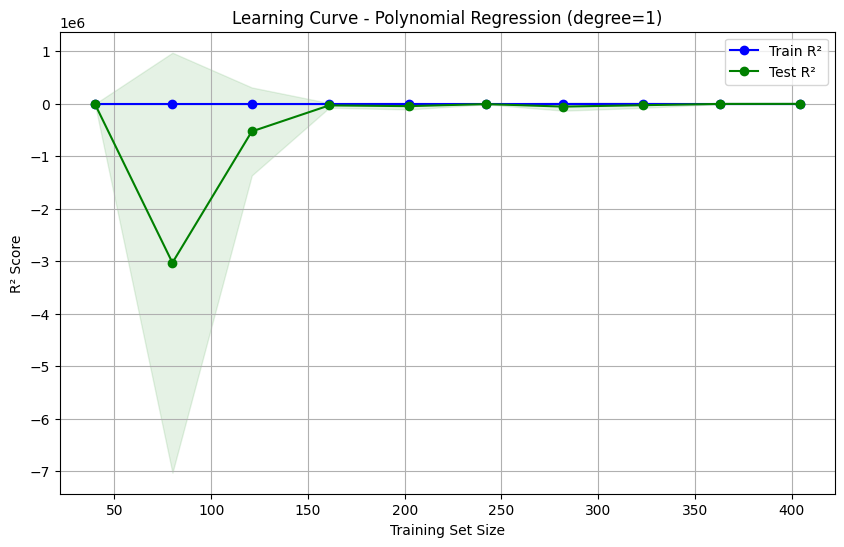

In [48]:

train_sizes, train_scores, test_scores = learning_curve(
    poly_model, x, y, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10), random_state=80
)

# Calculate mean and std for plotting
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Train R²')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')

plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='Test R²')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='green')

plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.title("Learning Curve - Polynomial Regression (degree=1)")
plt.legend(loc='best')
plt.grid()
plt.show()


In [51]:
# Step 3: Ridge, Lasso, ElasticNet
# -----------------------

ridge = make_pipeline(PolynomialFeatures(degree=1), Ridge(alpha=0.111))
lasso = make_pipeline(PolynomialFeatures(degree=1), Lasso(alpha=0.01, max_iter=10000))
elastic = make_pipeline(PolynomialFeatures(degree=1), ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=10000))

ridge.fit(x_train, y_train)
lasso.fit(x_train, y_train)
elastic.fit(x_train, y_train)

y_ridge = ridge.predict(x_test)
y_lasso = lasso.predict(x_test)
y_elastic = elastic.predict(x_test)

print("\n🔴 Ridge Regression:")
print("Test MSE:", mean_squared_error(y_test, y_ridge))
print("Test R²:", r2_score(y_test, y_ridge))

print("\n🟢 Lasso Regression:")
print("Test MSE:", mean_squared_error(y_test, y_lasso))
print("Test R²:", r2_score(y_test, y_lasso))

print("\n🟣 ElasticNet Regression:")
print("Test MSE:", mean_squared_error(y_test, y_elastic))
print("Test R²:", r2_score(y_test, y_elastic))


🔴 Ridge Regression:
Test MSE: 0.11831790619343968
Test R²: 0.8402797723539285

🟢 Lasso Regression:
Test MSE: 0.21328103840070936
Test R²: 0.7120867237943007

🟣 ElasticNet Regression:
Test MSE: 0.17941289465474922
Test R²: 0.757806157167392


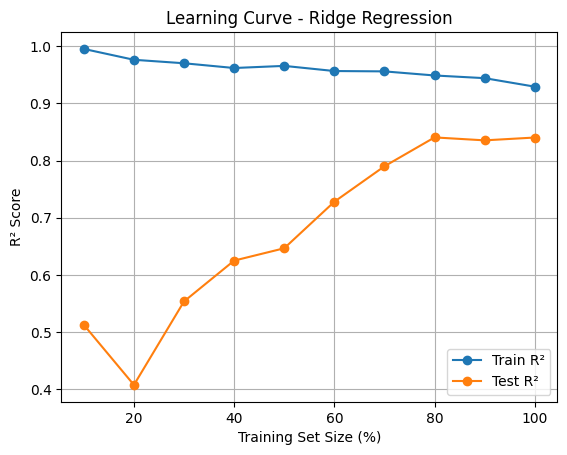

In [52]:


train_sizes = np.linspace(0.1, 1.0, 10)
train_scores = []
test_scores = []

for size in train_sizes:
    n_train = int(size * len(x_train))
    model = Ridge(alpha=0.111)
    model.fit(x_train[:n_train], y_train[:n_train])

    y_train_pred = model.predict(x_train[:n_train])
    y_test_pred = model.predict(x_test)

    train_scores.append(r2_score(y_train[:n_train], y_train_pred))
    test_scores.append(r2_score(y_test, y_test_pred))

plt.plot(train_sizes * 100, train_scores, marker='o', label='Train R²')
plt.plot(train_sizes * 100, test_scores, marker='o', label='Test R²')
plt.xlabel('Training Set Size (%)')
plt.ylabel('R² Score')
plt.title('Learning Curve - Ridge Regression')
plt.legend()
plt.grid(True)
plt.show()
